In [46]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

In [47]:
def f(x):
    return x**2 - 1

root = optimize.bisect(f, 0, 2)
# optimize.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True, )
# f: 함수, a, b: braket해줄 구간, maxiter=100: 몇번 interection할 건지(?) 100번 넘어가면 fail
print(root)

root = optimize.bisect(f, -2, 0)
print(root)

1.0
-1.0


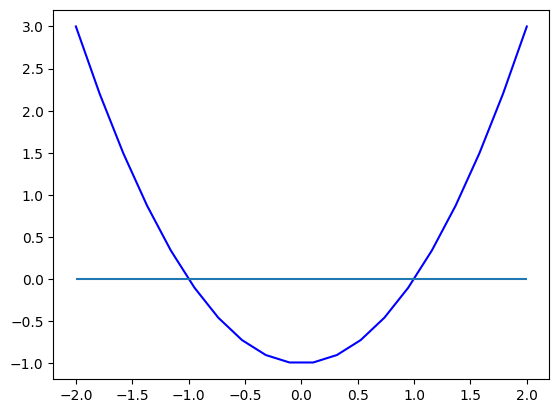

In [48]:
x = np.linspace(-2, 2, 20)
y = f(x)
plt.plot(x, y, c='b')
plt.hlines(0.0, -2.0, 2.0) # plt.hlines(y값, x최소값, x최대값)

1.0


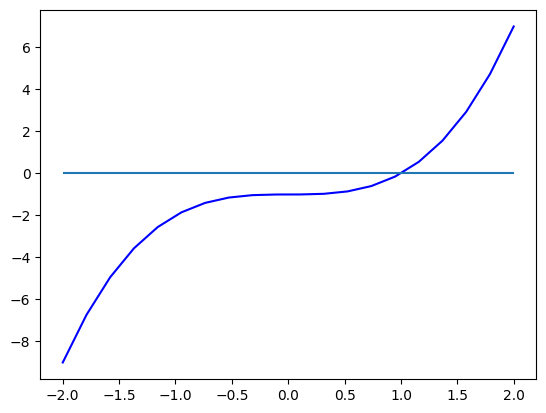

In [49]:
def f(x):
    return x**3 - 1

def deriv(x):
    return 3*x**2

root = optimize.newton(f, 1.5, fprime=deriv)
# optimize.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True, )
# x0: 초기값, fprime: 미분한 거, newton 같은 경우 braket 안 함
print(root)

x = np.linspace(-2, 2, 20)
y = f(x)
plt.plot(x, y, c='b')
plt.hlines(0.0, -2.0, 2.0)

In [50]:
def f(x):
    return x**3 - 1

def deriv(x):
    return 3*x**2

def newton_test(x):
    return x - f(x)/deriv(x)

x0 = 0.2
print(newton_test(x0))
x1 = 8.4
print(newton_test(x1))
x2 = 5.6
print(newton_test(x2))
x3 = 3.7
print(newton_test(x3))


8.466666666666665
5.604724111866969
3.7439625850340135
2.4910153396639885


In [51]:
def f(x):
    return x**3 - 1

def deriv(x):
    return 3*x**2

root1 = optimize.root_scalar(f, bracket=[0,3], method='bisect')
root2 = optimize.root_scalar(f, x0=0.2, fprime=deriv, method='newton')
print(root1)
print(' ')
print(root2)

      converged: True
           flag: converged
 function_calls: 43
     iterations: 41
           root: 1.0000000000004547
         method: bisect
 
      converged: True
           flag: converged
 function_calls: 22
     iterations: 11
           root: 1.0
         method: newton


In [52]:
# f(x)와 fprime(x)를 동시에 반환하는 함수
def f_deriv(x):
    return (x**3 - 1), 3*x**2

optimize.root_scalar(f_deriv, x0=0.2, fprime=True, method='newton')

      converged: True
           flag: converged
 function_calls: 11
     iterations: 11
           root: 1.0
         method: newton

In [53]:
from scipy.optimize import fsolve
# fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None, )

In [54]:
def func(x):
    return [x[0]*np.cos(x[1])-4, x[1]*x[0]-x[1]-5]

fsolve(func, [1,1])

array([6.50409711, 0.90841421])

실습

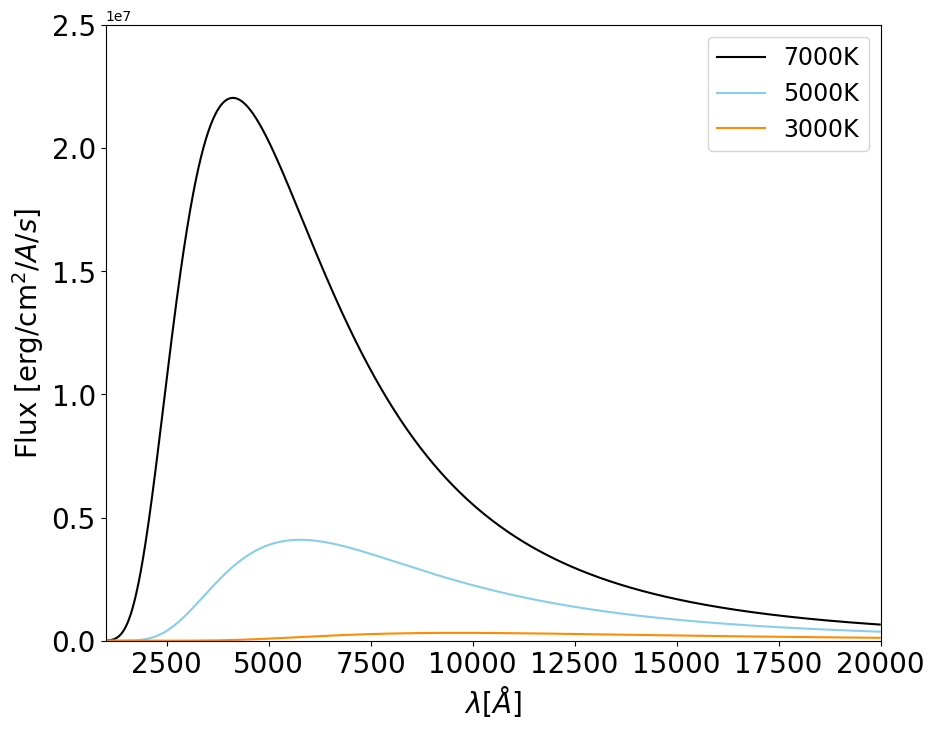

In [55]:
def my_planck(lamb_arr, T):
    c = 3.0e8
    kB = 1.382e-23
    h = 6.6e-34
    value = 2.*np.pi*h*c*c / (lamb_arr**5.0)
    value /= (np.exp(h*c/(lamb_arr*kB*T))-1.0)
    return value

plt.figure(figsize=(10,8))
T = [7000., 5000., 3000.]
color = ['black', 'skyblue', 'DarkOrange']
label = ['7000K', '5000K', '3000K']
lamb_arr = np.arange(1000.0*1e-10, 20000.*1e-10, 20e-10)

for i in range(len(T)):
    flux = my_planck(lamb_arr, T[i]) * 1e-7
    plt.plot(lamb_arr*1e10, flux, color = color[i], label = label[i])

ax=plt.gca()
ax.set_xlabel(r"$\lambda [\AA]$", fontsize=20)
ax.set_ylabel(r"Flux [erg/cm$^2/A/s]$", fontsize=20)
plt.xlim(1000,20000.)
plt.ylim(1e4, 2.5e7)
plt.xticks([2500,5000,7500,10000,12500,15000,17500,20000], fontsize=20)
plt.yticks([0,0.5e7,1.0e7,1.5e7,2.0e7,2.5e7], fontsize=20)
plt.legend(fontsize=17)

In [56]:
def my_planck(lamb_arr, T):
    c = 3.0e8
    kB = 1.382e-23
    h = 6.6e-34
    value = 2.*np.pi*h*c*c / (lamb_arr**5.0)
    value /= (np.exp(h*c/(lamb_arr*kB*T))-1.0)
    return value

def deriv(lamb_arr, T):
    c = 3.0e8
    kB = 1.382e-23
    h = 6.6e-34
    y = h*c / (lamb_arr*kB*T)
    return y*np.exp(y) / (np.exp(y)-1) - 5

In [57]:
root1 = optimize.root_scalar(deriv, bracket=[1000.0*1e-10, 20000*1e-10], args=(7000.), method='brentq')
print(root1)

      converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 4.12220802452205e-07
         method: brentq


In [58]:
root2 = optimize.root_scalar(deriv, bracket=[1000.0*1e-10, 20000*1e-10], args=(5000.), method='brentq')
print(root2)

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 5.771093082348327e-07
         method: brentq


In [59]:
root3 = optimize.root_scalar(deriv, bracket=[1000.0*1e-10, 20000*1e-10], args=(3000.), method='brentq')
print(root3)

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 9.618484513029146e-07
         method: brentq
